# Load the Dataset

In [2]:
import pandas as pd

insurance_df = pd.read_csv("insurance.csv")


# Display the first few rows
print("Medical Cost Dataset")
display(insurance_df.head())

Medical Cost Dataset


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Perform Exploratory Data Analysi

In [4]:
print("Missing values in Medical Cost Dataset:")
print(insurance_df.isnull().sum())




Missing values in Medical Cost Dataset:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
print("Medical Cost Data Types:\n", insurance_df.dtypes)


Medical Cost Data Types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [6]:
print("Medical Cost Dataset Statistics")
display(insurance_df.describe())



Medical Cost Dataset Statistics


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


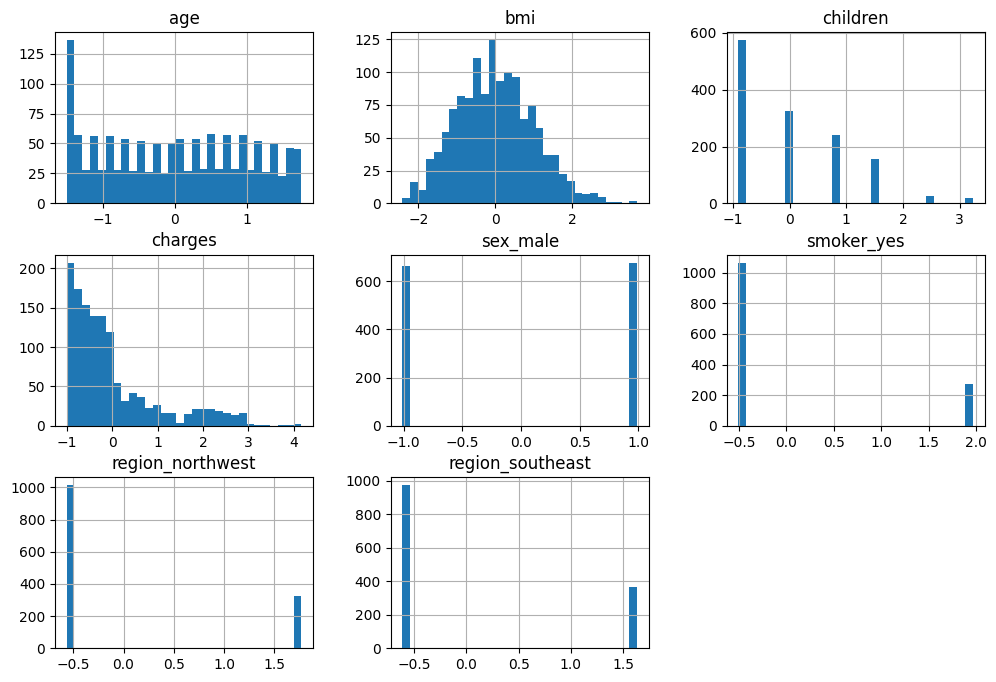

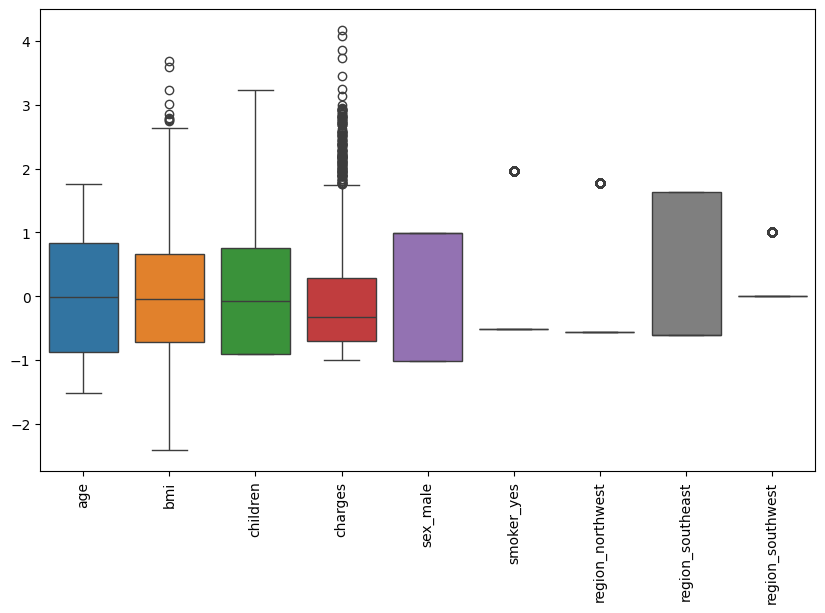

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for numerical features
insurance_df.hist(figsize=(12, 8), bins=30)
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=insurance_df)
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.show()

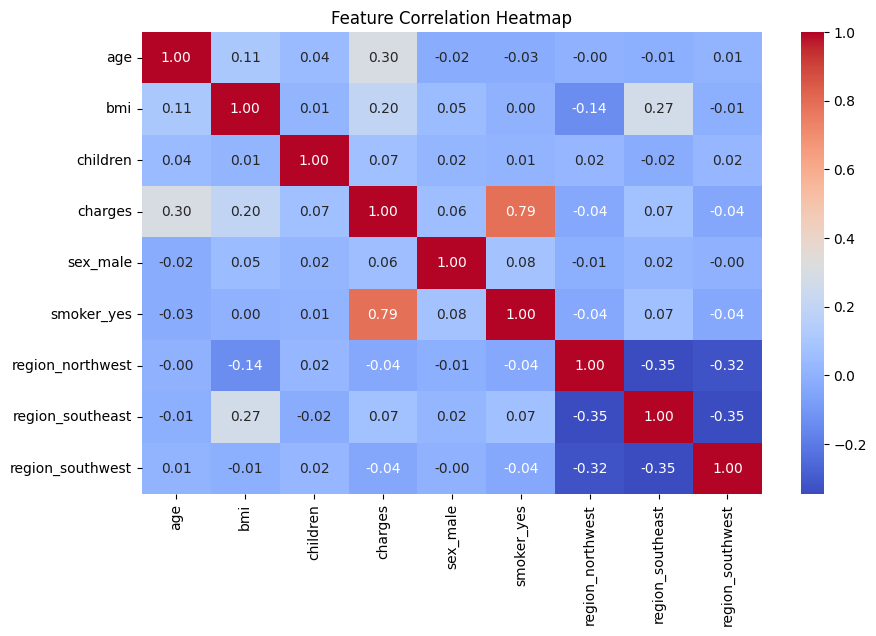

In [24]:

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(insurance_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



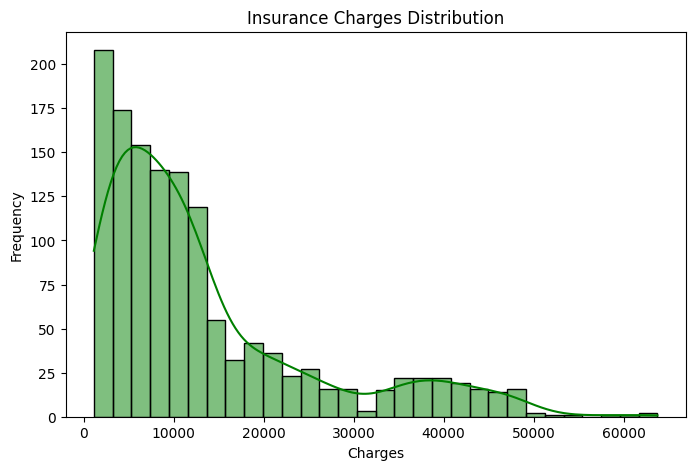

In [25]:

# Distribution of charges
plt.figure(figsize=(8,5))
sns.histplot(insurance_df['charges'], bins=30, kde=True, color="green")
plt.title("Insurance Charges Distribution")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()


In [8]:
print("Duplicates in Medical Cost Dataset:", insurance_df.duplicated().sum())


Duplicates in Medical Cost Dataset: 1


In [9]:
insurance_df.drop_duplicates(inplace=True)

In [10]:
print("Duplicates in Medical Cost Dataset:", insurance_df.duplicated().sum())

Duplicates in Medical Cost Dataset: 0


# Handle Missing Values

In [12]:
# Fill missing numerical values with median
insurance_df.fillna(insurance_df.select_dtypes(include=['number']).median(), inplace=True)



In [14]:
for col in insurance_df.select_dtypes(include=['object']).columns:
    insurance_df[col] = insurance_df[col].fillna(insurance_df[col].mode()[0])

 # Encoding Categorical Variables

In [15]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for categorical columns
insurance_df = pd.get_dummies(insurance_df, drop_first=True)


# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()  # Use MinMaxScaler() for min-max scaling

# Apply scaling

insurance_df.iloc[:, :-1] = scaler.fit_transform(insurance_df.iloc[:, :-1])



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3992\565609051.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.44041773 -1.51164747 -0.79935006 ... -1.51164747 -1.29795825
  1.55123139]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  insurance_df.iloc[:, :-1] = scaler.fit_transform(insurance_df.iloc[:, :-1])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3992\565609051.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.90923416 -0.07944162  1.58014347 ... -0.90923416 -0.90923416
 -0.90923416]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  insurance_df.iloc[:, :-1] = scaler.fit_transform(insurance_df.iloc[:, :-1])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3992\565609051.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will 

# Split Dataset into Train-Test Sets

In [17]:
from sklearn.model_selection import train_test_split



# Split Medical Cost Dataset
X_insurance = insurance_df.drop(columns=['charges'])
y_insurance = insurance_df['charges']
X_train_insurance, X_test_insurance, y_train_insurance, y_test_insurance = train_test_split(X_insurance, y_insurance, test_size=0.2, random_state=42)

